In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [5]:
ticker = 'AMD'
start = "1980-01-01"
end = "2025-01-01"
df = yf.download(tickers= ticker,start=start, end=end)

/tmp/ipython-input-1742632891.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers= ticker,start=start, end=end)
[*********************100%***********************]  1 of 1 completed


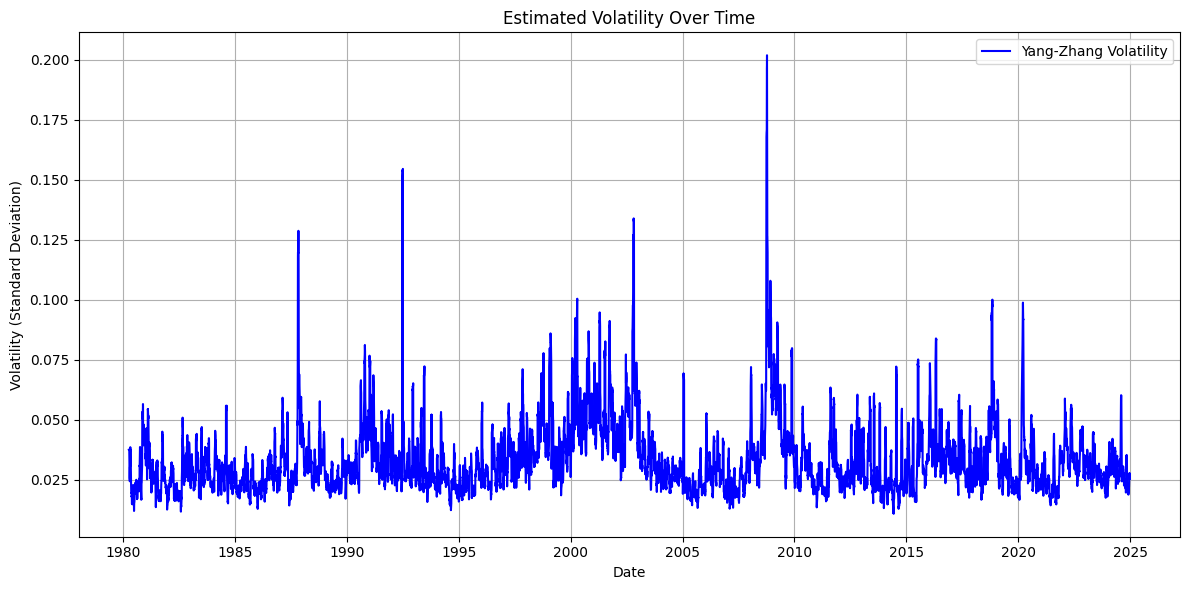

Estimated volatility Ticker
AMD    3.932746
dtype: float64


In [6]:
def yang_zhang_volatility(df, window):
    # Overnight (Close-to-Open) returns
    overnight_returns = np.log(df['Open'] / df['Close'].shift(1)).dropna()
    var_overnight = overnight_returns.var(ddof=1)

    # Intraday (Open-to-Close) returns
    intraday_returns = np.log(df['Close'] / df['Open']).dropna()
    var_intraday = intraday_returns.var(ddof=1)

    # Rogers-Satchell volatility
    log_hi_open = np.log(df['High'] / df['Open'])
    log_hi_close = np.log(df['High'] / df['Close'])
    log_lo_open = np.log(df['Low'] / df['Open'])
    log_lo_close = np.log(df['Low'] / df['Close'])
    rs_terms = log_hi_open * log_hi_close + log_lo_open * log_lo_close
    var_rs = rs_terms.mean()

    # Rolling window
    window = 10
    k = 0.34 / (1.34 + (window + 1) / (window - 1))

    sigma_oc = intraday_returns.rolling(window).var()
    sigma_co = overnight_returns.rolling(window).var()
    sigma_rs = rs_terms.rolling(window).mean()

    # Yang-Zhang variance
    yz_var = sigma_co + k * sigma_oc + (1 - k) * sigma_rs
    yz_vol = np.sqrt(yz_var)

    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, yz_vol, label="Yang-Zhang Volatility", color="blue")
    plt.title("Estimated Volatility Over Time")
    plt.xlabel("Date")
    plt.ylabel("Volatility (Standard Deviation)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Yang-Zhang volatility
    yz_variance = var_overnight + k * var_intraday + (1 - k) * var_rs
    yz_volatility = np.sqrt(yz_variance) * (len(df['Open'])**0.5)

    return yz_volatility
print("Estimated volatility", yang_zhang_volatility(df, len(df['Open'])))